### Student Information
Name: 薛揚

Student ID: 113062615

GitHub ID: Hsueh008

Kaggle name: Yang Hsueh

Kaggle private scoreboard snapshot:

![LocalImage](./img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home exercises** in the [DM2024-Lab2-master Repo](https://github.com/didiersalazar/DM2024-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/competitions/dm-2024-isa-5810-lab-2-homework) regarding Emotion Recognition on Twitter by this link: https://www.kaggle.com/competitions/dm-2024-isa-5810-lab-2-homework. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (0.6N + 1 - x) / (0.6N) * 10 + 20 points, where N is the total number of participants, and x is your rank. (ie. If there are 100 participants and you rank 3rd your score will be (0.6 * 100 + 1 - 3) / (0.6 * 100) * 10 + 20 = 29.67% out of 30%.)   
    Submit your last submission **BEFORE the deadline (Nov. 26th, 11:59 pm, Tuesday)**. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developing the model for the competition (You can use code and comment on it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 26th, 11:59 pm, Tuesday)__. 

In [1]:
### Begin Assignment Here

---
# I. Load Data

## Preparing data

1. Download the dataset, including the following files:

    ```
    dataset/
    ├── data_identification.csv
    ├── emotion.csv
    ├── sampleSubmission.csv
    └── tweets_DM.json
    ```

    Descriptions of each file:

    - `data_identification.csv:` Assign each "tweet_id" to a train or test label.

    - `emotion.csv:` Assign each "tweet_id" to a emotion label.

    - `sampleSubmission.csv:` Demonstration of format of submission.csv.

    - `tweets_DM.json:` Primary dataset, containing tweets.


In [2]:
# If you have not downloaded the dataset yet, uncomment the following lines.

# !kaggle competitions download -c dm-2024-isa-5810-lab-2-homework -p dataset/
# !unzip dataset/dm-2024-isa-5810-lab-2-homework.zip -d dataset/

2. Load `tweets_DM.json` into a dictionary, then take out the portion of `"tweet"` into a `DataFrame`.

In [ ]:
import json
import pandas as pd
import os

os.makedirs("dataset", exist_ok=True)

# This is raw data, we need to extract the train data and test data
with open("dataset/tweets_DM.json") as f:
    tweets = [json.loads(data) for data in f]
    tweets = [tweet["_source"]["tweet"] for tweet in tweets]

df_tweets = pd.DataFrame(tweets)
df_tweets.head()

,hashtags,tweet_id,text
0,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ..."
1,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #..."
2,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k..."
3,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>
4,[],0x2de201,"""Trust is not the same as faith. A friend is s..."


3. According to `data_identification.csv` to distinguish which "tweet_id" belongs to train or test dataset.

In [4]:
import csv

train_id = set()
test_id = set()
with open("dataset/data_identification.csv") as f:
    reader = csv.reader(f)
    for row in reader:
        if row[1] == "train":
            train_id.add(row[0])
        else:
            test_id.add(row[0])

4. According to `emotion.csv` to distinguish which "tweet_id" belongs to which emotion label.

In [5]:
import csv

emotion = {}
with open("dataset/emotion.csv") as f:
    reader = csv.reader(f)
    for row in reader:
        emotion[row[0]] = row[1]

5. Obtain `train_df` and `test_df`, and then encode the label by `LabelEncoder`.

In [6]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

# Extract the train data and test data
train_df = df_tweets[df_tweets["tweet_id"].isin(train_id)].reset_index(drop=True)
test_df = df_tweets[df_tweets["tweet_id"].isin(test_id)].reset_index(drop=True)
# Add the emotion column to the train data
train_df.loc[:, "emotion"] = train_df.apply(lambda x: emotion[x["tweet_id"]], axis=1)
train_df["label"] = labelencoder.fit_transform(train_df["emotion"])
train_df.head(10)

,hashtags,tweet_id,text,emotion,label
0,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ...",anticipation,1
1,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",sadness,5
2,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,fear,3
3,"[authentic, LaughOutLoud]",0x1d755c,@RISKshow @TheKevinAllison Thx for the BEST TI...,joy,4
4,[],0x2c91a8,Still waiting on those supplies Liscus. <LH>,anticipation,1
5,[],0x368e95,Love knows no gender. 😢😭 <LH>,joy,4
6,[LeagueCup],0x249c0c,@DStvNgCare @DStvNg More highlights are being ...,sadness,5
7,"[SSM, gender, diversity]",0x359db9,The #SSM debate; <LH> (a manufactured fantasy ...,anticipation,1
8,[],0x23b037,I love suffering 🙃🙃 I love when valium does no...,joy,4
9,[Pissed],0x1fde89,Can someone tell my why my feeds scroll back t...,anger,0


* Remove duplicate tweets.

In [7]:
train_df = train_df.drop_duplicates(subset=["text"]).reset_index(drop=True)
train_df["text"].duplicated().sum()

0

* Release memory.

In [8]:
# 釋放記憶體
del df_tweets
del tweets
del emotion
del train_id
del test_id

---
# II. Data Obeservation

- Following I will introduce the observation of data and the most effective preprocessing process in my homework. Following contents are discussed with my classmates and I conclude it in here. 

    1. According to the text in the block below, we find out that the `<LH>` is as same as `<mask>` token in LM, such as RoBERTa. Therefore, we replace it into the special token that used LM can recongnize it as a mask token.
        - Example:  
            ```
            People who post "add me on #Snapchat" must be dehydrated. Cuz man.... that\'s <LH>
            ```
       - becomes:  
            ```
            People who post "add me on #Snapchat" must be dehydrated. Cuz man.... that\'s <mask>
            ```
    
    2. We observe that there are some data containing too much `<LH>` in their tweets, the counting shows in the third and fourth block below. I though if there are too many `LH`, `@`, and `#` may be meaningless or hard to distinguish, so I remove some data exceed threshold.

        - Example:  
            ```json
            {
                "tweet_id": "0x2aaa9d",
                "tweets": "@berksmike @SussexMistress @bradfordmistres @MistressYvonne @domstrapon @MsScarlettBlack @missjulia2013 @MadameC5 Really <LH> 😊"
            }
            ```

In [9]:
train_df.loc[0]["text"]

'People who post "add me on #Snapchat" must be dehydrated. Cuz man.... that\'s <LH>'

In [10]:
# count the number of words in each tweet, and the number of <LH>, @, # in each tweet
train_df.loc[:, "length"] = train_df["text"].apply(lambda x: len(x.split()))
train_df.loc[:, "<LH>"] = train_df["text"].apply(lambda x: x.count("<LH>"))
train_df.loc[:, "@"] = train_df["text"].apply(lambda x: x.count("@"))
train_df.loc[:, "#"] = train_df["text"].apply(lambda x: x.count("#"))
# calculate the noise rate in each tweet
train_df.loc[:, "noise rate"] = (
    train_df["<LH>"] + train_df["@"] + train_df["#"]
) / train_df["length"]


test_df.loc[:, "length"] = test_df["text"].apply(lambda x: len(x.split()))
test_df.loc[:, "<LH>"] = test_df["text"].apply(lambda x: x.count("<LH>"))
test_df.loc[:, "@"] = test_df["text"].apply(lambda x: x.count("@"))
test_df.loc[:, "#"] = test_df["text"].apply(lambda x: x.count("#"))
test_df.loc[:, "noise rate"] = (
    test_df["<LH>"] + test_df["@"] + test_df["#"]
) / test_df["length"]

In [11]:
noise_rate = 2 / 3
lh_max = 4

lh_rate_count = train_df[train_df["noise rate"] >= noise_rate].shape[0]
lh_count = train_df[train_df["<LH>"] > lh_max].shape[0]

print(f"Number of rows with (noise rate >= {noise_rate:.2f}): {lh_rate_count}")
print(f"Number of rows with (<LH> > {lh_max}): {lh_count}")


# Filter the rows with <LH> rate >= 2/3 or <LH> >= 5
filtered_df = train_df[
    (train_df["noise rate"] >= noise_rate) | (train_df["<LH>"] > lh_max)
]

# Convert the filtered dataframe to a list of dictionaries
filtered_texts = filtered_df.to_dict(orient="records")

# Save the list of dictionaries to a JSON file
with open("filtered_texts.json", "w") as outfile:
    json.dump(filtered_texts, outfile, ensure_ascii=False, indent=4)

Number of rows with (noise rate >= 0.67): 38505
Number of rows with (<LH> > 4): 39817


In [12]:
noise_rate = 2 / 3
lh_max = 4

lh_rate_count = test_df[test_df["noise rate"] >= noise_rate].shape[0]
lh_count = test_df[test_df["<LH>"] > lh_max].shape[0]

print(f"Number of rows with (noise rate >= {noise_rate:.2f}): {lh_rate_count}")
print(f"Number of rows with (<LH> > {lh_max}): {lh_count}")


# Filter the rows with <LH> rate >= 2/3 or <LH> > 4
filtered_df = test_df[
    (test_df["noise rate"] >= noise_rate) | (test_df["<LH>"] > lh_max)
]

# Convert the filtered dataframe to a list of dictionaries
filtered_texts = filtered_df.to_dict(orient="records")

# Save the list of dictionaries to a JSON file
with open("filtered_texts_test.json", "w") as outfile:
    json.dump(filtered_texts, outfile, ensure_ascii=False, indent=4)

Number of rows with (noise rate >= 0.67): 548
Number of rows with (<LH> > 4): 0


- Remove rows with noise rate >= 2/3 or `<LH>` > 4

In [13]:
# Remove rows with noise rate >= 2/3 or <LH> > 4
train_df = train_df[
    (train_df["noise rate"] < noise_rate) & (train_df["<LH>"] <= lh_max)
]

In [14]:
print("train data")
lh_rate_count = train_df[train_df["noise rate"] >= noise_rate].shape[0]
lh_count = train_df[train_df["<LH>"] > lh_max].shape[0]

print(f"Number of rows with (noise rate >= {noise_rate:.2f}): {lh_rate_count}")
print(f"Number of rows with (<LH> > {lh_max}): {lh_count}")

train data
Number of rows with (noise rate >= 0.67): 0
Number of rows with (<LH> > 4): 0


---
# III. Data Preprocessing

## Preprocess Function

- Briefly preprocessing with some effective process.

In [15]:
import re
from spellchecker import SpellChecker

spell = SpellChecker()


def preprocess_tweet(text):
    text = re.sub(r"(https?://)?[\w.-]+\.com(\.\w+)?", "<URL>", text)  # replace URLs
    text = re.sub(r"<LH>", "<mask>", text)  # replace "<LH>" with "<mask>"
    text = re.sub(r"\s+", " ", text)  # remove extra whitespaces

    return text

## Preprocessing

In [16]:
from multiprocessing import Pool
from tqdm import tqdm
import os


def preprocess_with_progress(data, func, num_workers=4):
    with Pool(num_workers) as pool:
        results = list(tqdm(pool.imap(func, data), total=len(data)))
    return results


train_df["text"] = preprocess_with_progress(train_df["text"], preprocess_tweet)
test_df["text"] = preprocess_with_progress(test_df["text"], preprocess_tweet)

100%|██████████| 411972/411972 [00:06<00:00, 65347.44it/s]


---
# IV. Model Training

1. In this part, I used a pre-trained encoder model from Twitter, `Twitter/twhin-bert-base`, to do a classification task. The hyperparameters are as follows:

    ```python
    train_batch_size = 256
    val_batch_size = 256
    dropout_rate = 0.1
    lr = 2e-5
    epochs = 5
    val_split = 0.1
    ```

- Hyperparameter

In [17]:
import torch

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_name = "Twitter/twhin-bert-base"

# Hyperparameters
train_batch_size = 256
val_batch_size = 256
dropout_rate = 0.1
lr = 2e-5
epochs = 5
val_split = 0.1

---

2. Construct `Dataset` and `Dataloader` from `pytorch` module to easily input data batch into model.

- Dataset

In [18]:
from torch.utils.data import Dataset
from sklearn.model_selection import train_test_split


class TweetDataset(Dataset):
    def __init__(self, df):
        super().__init__()
        self.id = df["tweet_id"].tolist()
        self.text = df["text"].tolist()
        # Check if the label column exists: for training data
        if "label" in df.columns:
            self.label = df["label"].tolist()
        else:
            self.label = None

    def __len__(self):
        return len(self.text)

    def __getitem__(self, idx):
        item = {"id": self.id[idx], "text": self.text[idx]}
        # Check if the label column exists: for training data
        if self.label is not None:
            item["label"] = self.label[idx]
        return item


# Split the train data into training and validation sets
train_data, val_data = train_test_split(train_df, test_size=val_split, random_state=42)

# Create datasets
ds_train = TweetDataset(train_data)
ds_val = TweetDataset(val_data)

- Dataloader

In [19]:
from torch.utils.data import DataLoader
from transformers import AutoTokenizer, AutoModel

tokenizer = AutoTokenizer.from_pretrained(model_name)


# Load the dataset and finish the preprocessing
def collate_fn(batch):
    inputs = tokenizer(
        [data["text"] for data in batch],
        padding=True,
        max_length=128,
        truncation=True,
        return_tensors="pt",
    )
    inputs = inputs.to(device)

    labels = torch.tensor([data["label"] for data in batch], dtype=torch.long)
    labels = labels.to(device)
    return inputs, labels


dl_train = DataLoader(
    ds_train,
    batch_size=train_batch_size,
    shuffle=True,
    collate_fn=collate_fn,
)
dl_val = DataLoader(
    ds_val,
    batch_size=val_batch_size,
    shuffle=True,
    collate_fn=collate_fn,
)

/home/S113062615/DM-2024/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


---

3. Load the required pre-trained model and define the downstream task to perform the classification task, and setup the optimizer and loss function.
```python
    model_name = "Twitter/twhin-bert-base"
```


- model definition

In [20]:
class TweetEmotionClassifier(torch.nn.Module):
    def __init__(self, model_name, dropout=0.1):
        super().__init__()
        self.bert = AutoModel.from_pretrained(model_name)
        self.dropout = torch.nn.Dropout(p=dropout)
        self.linear = torch.nn.Linear(self.bert.config.hidden_size, 8)

    def forward(self, **kwargs):
        output = self.bert(**kwargs)
        cls_output = output.last_hidden_state[:, 0, :]
        cls_output = self.dropout(cls_output)
        logits = self.linear(cls_output)

        return logits

    def extract_features(self, **kwargs):
        output = self.bert(**kwargs)
        cls_output = output.last_hidden_state[:, 0, :]
        return cls_output


model = TweetEmotionClassifier(model_name, dropout=dropout_rate)

2024-12-05 22:42:30.934262: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-05 22:42:30.940679: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733409750.947480  423242 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733409750.949514  423242 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-05 22:42:30.957862: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

- optimizer and loss function

In [21]:
from torch.optim import AdamW
from torchmetrics.classification import MulticlassAccuracy, MulticlassF1Score

optimizer = AdamW(model.parameters(), lr=lr)

criteria = torch.nn.CrossEntropyLoss()

acc = MulticlassAccuracy(num_classes=8).to(device)
f1 = MulticlassF1Score(num_classes=8).to(device)

---

4. training and evaluation

In [22]:
from tqdm import tqdm
import os

saved_dic = f"./saved_model/twhin-bert_b{train_batch_size}"
if not os.path.exists(saved_dic):
    os.makedirs(saved_dic)

best_model = {"ep": -1, "loss": float("inf")}
model.to(device)
for ep in range(epochs):
    model.train()
    bar = tqdm(dl_train, desc=f"Training Epoch [{ep + 1}/{epochs}]")
    train_loss = 0
    for inputs, labels in bar:
        optimizer.zero_grad()
        logits = model(**inputs)
        loss = criteria(logits, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        bar.set_postfix(
            loss=train_loss / (bar.n + 1), lr=optimizer.param_groups[0]["lr"]
        )

    model.eval()
    bar = tqdm(dl_val, desc=f"Validation Epoch [{ep + 1}/{epochs}]")
    val_loss = 0
    acc.reset()
    f1.reset()
    with torch.no_grad():
        for inputs, labels in bar:
            logits = model(**inputs)
            loss = criteria(logits, labels)

            val_loss += loss.item()
            bar.set_postfix(loss=val_loss / (bar.n + 1))

            acc.update(logits, labels)
            f1.update(logits, labels)

    if val_loss < best_model["loss"]:
        best_model["ep"] = ep
        best_model["loss"] = val_loss

    print(f"Accuracy: {acc.compute():.4f}")
    print(f"F1 Score: {f1.compute():.4f}")
    torch.save(model, f"{saved_dic}/ep{ep}.ckpt")

print(f"Best model is at epoch {best_model['ep']} with loss {best_model['loss']}")

Validation Epoch [1/5]: 100%|██████████| 538/538 [01:43<00:00,  5.18it/s, loss=0.941]


Accuracy: 0.5598
F1 Score: 0.5836


Validation Epoch [2/5]: 100%|██████████| 538/538 [01:43<00:00,  5.19it/s, loss=0.913]


Accuracy: 0.5759
F1 Score: 0.6001


Validation Epoch [3/5]: 100%|██████████| 538/538 [01:43<00:00,  5.19it/s, loss=0.906]


Accuracy: 0.5859
F1 Score: 0.6066


Validation Epoch [4/5]: 100%|██████████| 538/538 [01:44<00:00,  5.17it/s, loss=0.927]


Accuracy: 0.5874
F1 Score: 0.6101


Validation Epoch [5/5]: 100%|██████████| 538/538 [01:43<00:00,  5.17it/s, loss=0.958]


Accuracy: 0.5944
F1 Score: 0.6053
Best model is at epoch 2 with loss 487.61154931783676


---


5. Load model and output submission file

In [23]:
from tqdm import tqdm


def collate_fn_test(batch):
    inputs = tokenizer(
        [data["text"] for data in batch],
        padding=True,
        truncation=True,
        return_tensors="pt",
    )
    inputs = inputs.to(device)

    ids = [data["id"] for data in batch]
    return inputs, ids


ds_test = TweetDataset(test_df)
dl_test = DataLoader(
    ds_test, batch_size=val_batch_size, shuffle=False, collate_fn=collate_fn_test
)

model = torch.load(f"./saved_model/twhin-bert_b256/ep{best_model['ep']}.ckpt")
model.to(device)
model.eval()
id = []
emotion = []
with torch.no_grad():
    bar = tqdm(dl_test, desc="Testing")
    for inputs, ids in bar:
        logits = model(**inputs)
        pred = torch.argmax(logits, dim=1)
        id.extend(ids)
        emotion.extend(pred.tolist())

emotion = labelencoder.inverse_transform(emotion)
submission = pd.DataFrame({"id": id, "emotion": emotion})
submission.head(10)

/tmp/ipykernel_423242/1817341918.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(f"./saved_model/twhin-bert_b256/ep{best_model['ep']}.ckpt")
Testing:

,id,emotion
0,0x28b412,anticipation
1,0x2de201,trust
2,0x218443,joy
3,0x2939d5,joy
4,0x26289a,trust
5,0x31c6e0,joy
6,0x32edee,sadness
7,0x3714ee,anger
8,0x235628,joy
9,0x283024,sadness


In [26]:
submission.to_csv(f"submission/submission_twhin-bert_Wpre_v1.csv", index=False)

---
6. Plot the t-SNE graph to observe the distribution of each label (by ChatGPT)

/tmp/ipykernel_423242/1237199526.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(
Extracting Features: 100%|██████████| 49/49 [00:10<00:00,  4.84it/s]

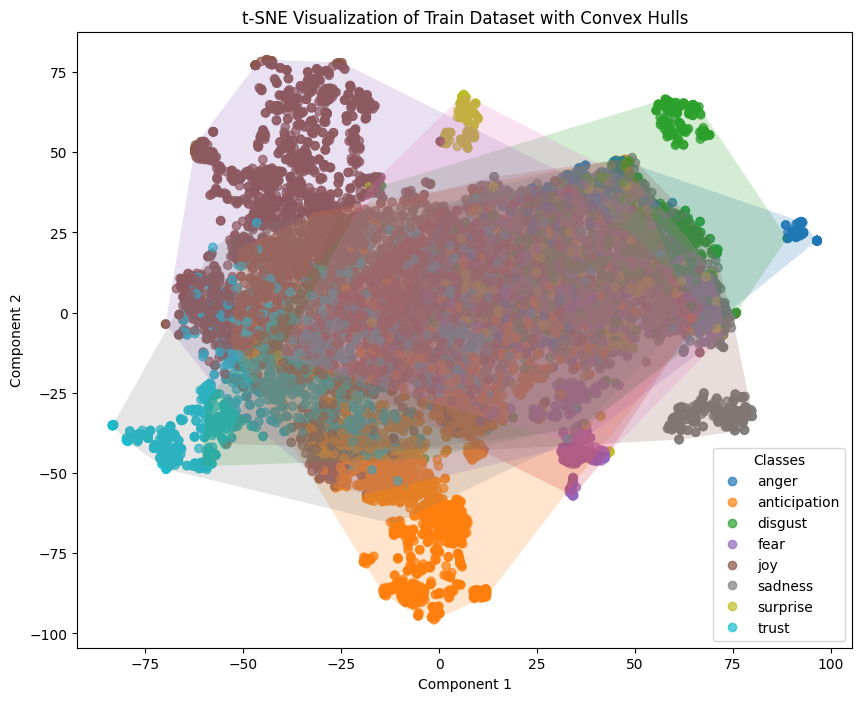

In [25]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull

# 1. 載入模型和資料集
model = torch.load(
    "/home/S113062615/DM-2024/DM2024-Lab2-Kaggle/twhin-bert_b256_Wpre_v1_&_rm_LH/ep3.ckpt"
)
model.eval()

df_data = train_data.sample(frac=0.01, random_state=42)
ds_data = TweetDataset(df_data)
dl_data = DataLoader(ds_data, batch_size=256, shuffle=False, collate_fn=collate_fn)

# 2. 提取訓練資料的 embeddings
embeddings = []
labels = []
with torch.no_grad():
    bar = tqdm(dl_data, desc="Extracting Features")
    for inputs, labels_ in bar:
        output = model.extract_features(**inputs)
        embeddings.extend(output.tolist())
        labels.extend(labels_.tolist())

embeddings = np.vstack(embeddings)
labels = np.hstack(labels)

# 3. 使用 t-SNE 進行降縮
tsne = TSNE(
    n_components=2,
    random_state=42,
)
embeddings_2d = tsne.fit_transform(embeddings)

# 4. 畫出 t-SNE 圖
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    embeddings_2d[:, 0], embeddings_2d[:, 1], c=labels, cmap="tab10", alpha=0.7
)

# 繪製每個類別的凸包範圍
unique_labels = np.unique(labels)
for label in unique_labels:
    # 選取每個類別的點
    points = embeddings_2d[labels == label]

    # 當該類別的點數量大於 2 時，才計算 ConvexHull
    if len(points) > 2:
        hull = ConvexHull(points)
        hull_points = points[hull.vertices]

        # 繪製凸包
        plt.fill(hull_points[:, 0], hull_points[:, 1], alpha=0.2)

plt.title("t-SNE Visualization of Train Dataset with Convex Hulls")
plt.xlabel("Component 1")
plt.ylabel("Component 2")

# 5. 標示各個類別的名稱
class_names = labelencoder.inverse_transform(range(8))
handles, _ = scatter.legend_elements()
legend = plt.legend(handles, class_names, title="Classes", loc="best")

plt.show()